Import a Library & Read CSV File

In [35]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 



#### READ ######
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Choose Fetuare 

In [50]:
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

Normalize

In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Elbow Method

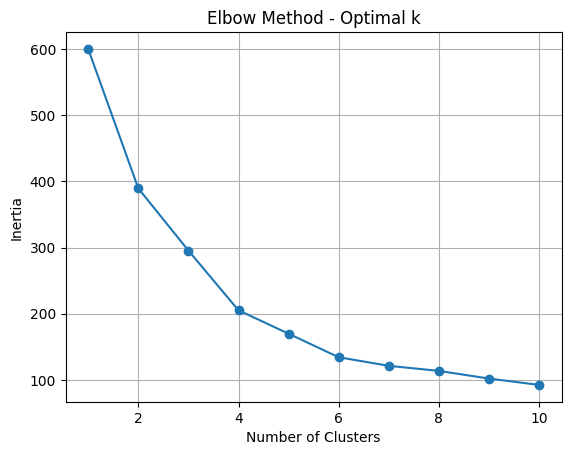

In [60]:
K_range = range(1,11)
inertia = []

for k in K_range :
  kmeans_ = KMeans(n_clusters=k , random_state= 42)
  kmeans_.fit(X_scaled)
  inertia.append(kmeans_.inertia_)


####Plotting#####
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method - Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

Modelling

In [62]:
kmeans = KMeans(n_clusters=5 , random_state=42)
clusters = kmeans.fit_predict(X_scaled)
#df = df.drop("CustomerID" , axis=1)
df["Cluster"] = clusters


numeric_cols = df.select_dtypes(include='number').columns
df.groupby('Cluster')[numeric_cols].mean()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
Cluster,,,,
0,55.275862,47.620690,41.706897,0.0
1,32.875000,86.100000,81.525000,1.0
2,25.769231,26.115385,74.846154,2.0
3,26.733333,54.311111,40.911111,3.0
4,44.387097,89.774194,18.483871,4.0


2D plot

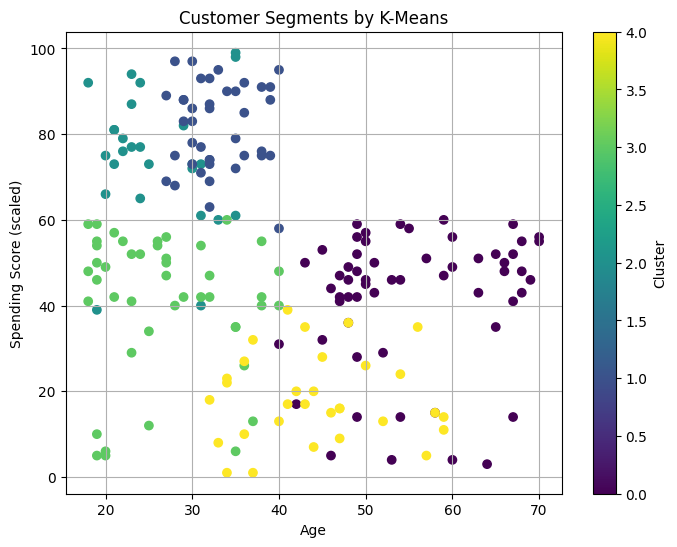

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 2], c=clusters, cmap='viridis')
plt.xlabel("Age")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segments by K-Means")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()